For the following examples we'll use `sklearn` california housing dataset


In [1]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
df = housing.frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# Training a model


## train_model


`train_model` returns a tuple, where first element is the trained model, and second element is a dictionary that includes validation set, evaluation score etc.


In [2]:
from ml_qol import train_model

model = train_model(
    model_type="lightgbm",
    task="regression",
    params={
        "iterations": 500,
        "learning_rate": 1e-2,
        "loss_function": "RMSE",
        "depth": 2,
        "metric": "mae",
    },
    train_data=df,
    target_col="MedHouseVal",
)
model

valid_data is not explicitly passed, hence performing random split on train_data
Training until validation scores don't improve for 500 rounds


/home/mashrur/anaconda3/envs/my_env/lib/python3.12/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[100]	training's l1: 0.6752	valid_1's l1: 0.677453
[200]	training's l1: 0.586777	valid_1's l1: 0.59328
[300]	training's l1: 0.526912	valid_1's l1: 0.535409
[400]	training's l1: 0.489301	valid_1's l1: 0.49827
[500]	training's l1: 0.461147	valid_1's l1: 0.469485
Did not meet early stopping. Best iteration is:
[500]	training's l1: 0.461147	valid_1's l1: 0.469485

Validation mse score: 0.42318036823393573


LGBMRegressor(learning_rate=0.01, max_depth=2, metric='mae', num_iterations=500,
              objective='rmse', verbosity=-1)

In [3]:
model.X_valid

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
...,...,...,...,...,...,...,...,...
15362,4.6050,16.0,7.002212,1.066372,1351.0,2.988938,33.36,-117.22
16623,2.7266,28.0,6.131915,1.256738,1650.0,2.340426,35.36,-120.83
18086,9.2298,25.0,7.237676,0.947183,1585.0,2.790493,37.31,-122.05
2144,2.7850,36.0,5.289030,0.983122,1227.0,2.588608,36.77,-119.76


In [4]:
model.valid_preds

array([1.01406807, 1.33998345, 3.15300682, ..., 4.2430044 , 1.46898105,
       1.85050368])

#### `train_model` parameters

- **model_type**: Currently supports `catboost`, `lightgbm`, and `xgboost`. Defaults to `catboost`
- **task**: 'regression' or 'classification'. Defaults to 'regression
- **params**: dict of hyper-parameters for training. Default params: {
  'iterations': 1000,
  'learning_rate': 0.01,
  'loss_function': 'RMSE',
  'device': 'CPU'
  }
- **train_data**: Training data as a pandas.DataFrame.
- **valid_data**: Validation data as pandas.DataFrame. If valid_data is not passed, a random split will be done using train_data, which will be used as validation set
- **target_col**: Name of target column in data
- **metric**: Indicates how to calculate final validation score. Supported values: "mse", "mae", "accuracy", "f1"
- **verbose**: Controls frequency of evaluation logs. Defaults to 100
- **early_stop**: Number of iterations after which training will stop if no improvement is found in validation score. Defaults to 500
- **random_state**: Seed used to control the randomness in model training and data splitting. Defaults to 42 for reproducible results. Pass `None` to achieve non-deterministic behavior.
- **test_size**: Controls what portion of train_data that will be used as validation set. Defaults to 0.2


# Model Wrapper

The trained model output from `train_model` is wrapped in a Class that provides helpful tools like, plot_importance, confusion_matrix


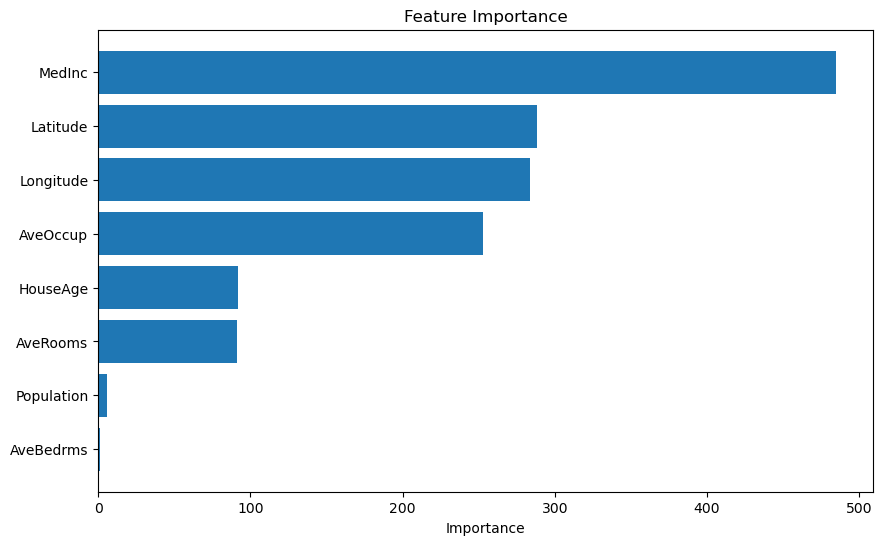

In [5]:
model.plot_importance()

# Other helper functions


## get_model


In [6]:
from ml_qol import get_model

catboost_model = get_model(
    model_type="catboost",
    task="regression",
    params={
        "iterations": 1500,
        "learning_rate": 1e-2,
        "loss_function": "binary",
        "depth": 6,
        "metric": "accuracy",
    },
)
catboost_model

#### `get_model` parameters

- **model_type**: Currently supports `catboost`, `lightgbm`, and `xgboost`. Defaults to `catboost`
- **task**: 'regression or 'classification. Defaults to 'regression
- **params**: dict of hyperparameters for training. Default params: {
  'iterations': 1000,
  'learning_rate': 0.01,
  'loss_function': 'RMSE',
  'device': 'CPU'
  }


## map_params

Converts user specified parameters into correct format for different ML libraries (e.g., CatBoost, LightGBM)


In [7]:
from ml_qol import map_params

lgbm_params = map_params(
    model_type="lightgbm",
    user_params={
        "iterations": 1500,
        "learning_rate": 1e-2,
        "loss_function": "binary",
        "depth": 6,
        "metric": "accuracy",
        "subsample": 0.9,
    },
)
lgbm_params

{'num_iterations': 1500,
 'learning_rate': 0.01,
 'objective': 'binary',
 'max_depth': 6,
 'metric': 'accuracy',
 'bagging_fraction': 0.9}

#### `map_params` parameters

- **model_type**: Currently supports `catboost`, `lightgbm`, and `xgboost`. Defaults to `catboost`.
- **user_params**: dict of user specified hyperparameters to be converted.
